In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\LPU\sem-5\UPGRAD\EDA\DataSets\loan.csv",low_memory = False)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(7), object(29)
memory usage: 33.6+ MB


### Data wrangling
#### Data Cleaning and Data manipulation

In [5]:
#checking the no.of null values in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        40
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#removing all the null columns and analysing data with only non null columns first
df.dropna(axis = 1,inplace=True)

In [7]:
#finding the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [8]:
#checking id and member id if the contain all distinct values or not so that i can drop them
df[["id","member_id"]].nunique()

id           39717
member_id    39717
dtype: int64

In [9]:
#dropping columns on the basis of index location
#iloc is use to pass index of columns of rows and columns
df.drop(df.iloc[:,0:2],inplace = True,  axis = 1)

In [10]:
#finding unique types of home ownership to know how many types of home ownership does people have
df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

c:\Users\OMKAR VYAS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='home_ownership'>

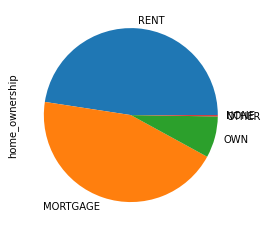

In [11]:
#plotting pie chart to know how the portion of population living in a rented house and own house
df["home_ownership"].value_counts(normalize = True).plot(kind= "pie")


In [12]:
#df["emp_length"]

In [13]:
#df["emp_title"].unique()

In [14]:
#thi step is done to get a insight on how the population is devided on the basis of grades 
df["grade"].value_counts(normalize = True)

B    0.302641
A    0.253921
C    0.203893
D    0.133620
E    0.071556
F    0.026412
G    0.007956
Name: grade, dtype: float64

In [15]:
#This step is done to know how many uniques sub grade points exist
df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [16]:
verif =  df["verification_status"].value_counts(normalize = True)

In [17]:
df["loan_status"].value_counts(normalize = True).plot(kind="")

ValueError:  is not a valid plot kind

<AxesSubplot:>

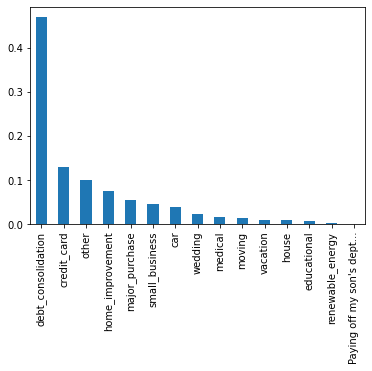

In [ ]:
df["purpose"].value_counts(normalize = True).plot(kind= "bar")

In [ ]:

issue = df["issue_d"].str.split("-", n = 1, expand= True)

df["issue_month"] = issue[1]
df["issue_month"].value_counts(normalize = True)

Dec    0.111615
Nov    0.104917
Oct    0.099051
Sep    0.091850
Aug    0.088577
Jul    0.087519
Jun    0.082559
May    0.075509
Apr    0.071355
Mar    0.067780
Jan    0.059899
Feb    0.059370
Name: issue_month, dtype: float64

In [18]:

df["int_rate"] = df["int_rate"].str.strip("%")

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  pymnt_plan               39717 non-null  object 
 14  url                   

In [21]:
fig,axs = plt.(figsize = (10,5))

sns.boxplot(x=df["loan_amnt"], notch = True , color= "orange")



SyntaxError: invalid syntax (Temp/ipykernel_20052/1205764735.py, line 1)

In [22]:


#term = df["term"].str.split(" ",n=1,expand = True)
#df["term"] = term[1]

df["term"] = df["term"].str.strip(" months")


In [23]:
df["term"] = df["term"].convert_dtypes("int64")
term_value = df["term"].value_counts(normalize= True)


In [24]:
df["term"].unique()

<StringArray>
['36', '60']
Length: 2, dtype: string

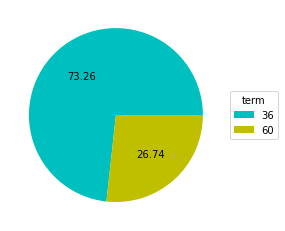

In [25]:
from matplotlib import pyplot as plt
term = [36,60]
plt.pie(term_value ,colors="cyan" ,autopct="%.2f")

plt.legend( term,
          title ="term",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 

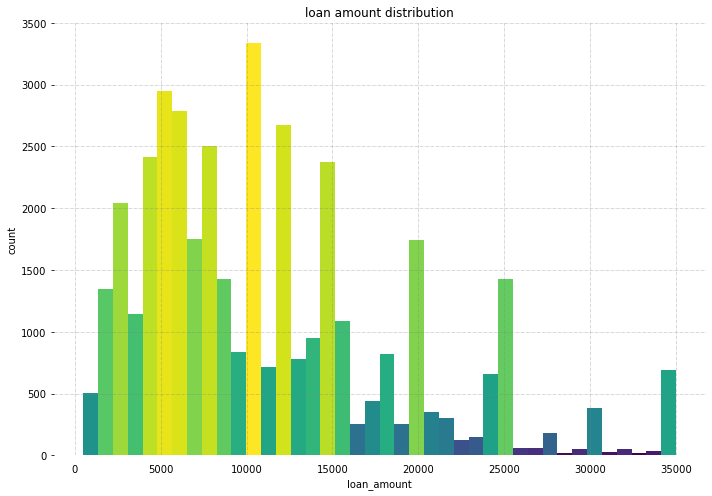

In [26]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


# Creating distribution
x = df["loan_amnt"]



# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize=(10, 7),
                        tight_layout=True)


# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')


# Add padding between axes and labels
axs.xaxis.set_tick_params(pad=5)

# Add x, y gridlines
axs.grid(b=True, color='grey',
         linestyle='-.', linewidth=0.5,
         alpha=0.6)




# Creating histogram
N, bins, patches = axs.hist(x, bins= 40)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features
plt.xlabel("loan_amount")
plt.ylabel("count")
plt.title('loan amount distribution')

# Show plot
plt.show()


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

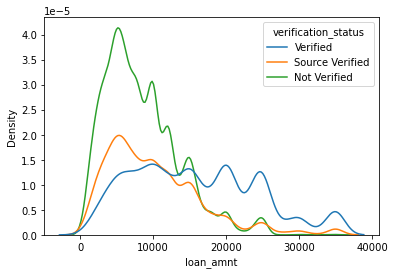

In [27]:
#fig, axs = plt.subplots(1, 1,figsize=(20,6),tight_layout=True)
#df["annual_inc"].drop(df["annual_inc"]>1000000)                        

sns.kdeplot(x="loan_amnt", hue="verification_status", data=df)


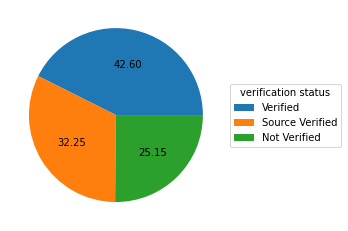

In [28]:
plt.pie(verif,autopct="%.2f")


plt.legend(df["verification_status"].unique(),
           title="verification status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))


(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
 <BarContainer object of 9 artists>)

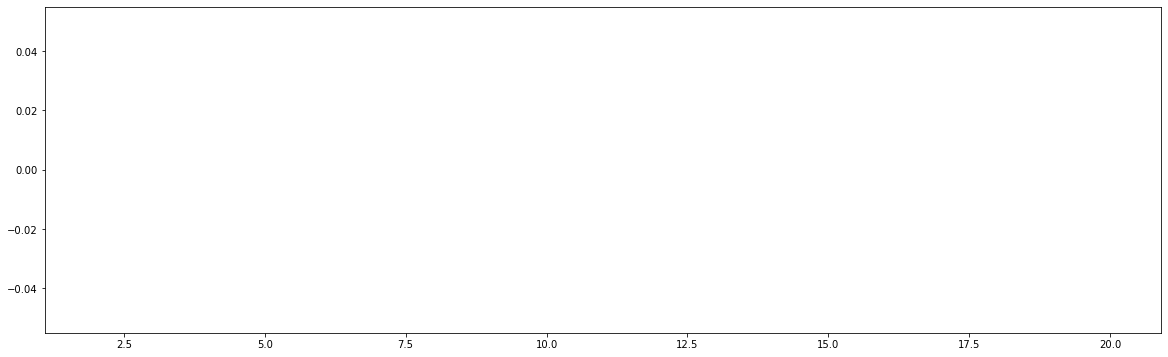

In [29]:
fig,ax = plt.subplots(figsize= (20,6)) 
ax.hist(df["annual_inc"],bins = [2,4,6,8,10,12,14,16,18,20])

In [30]:
df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

TypeError: Horizontal orientation requires numeric `x` variable.

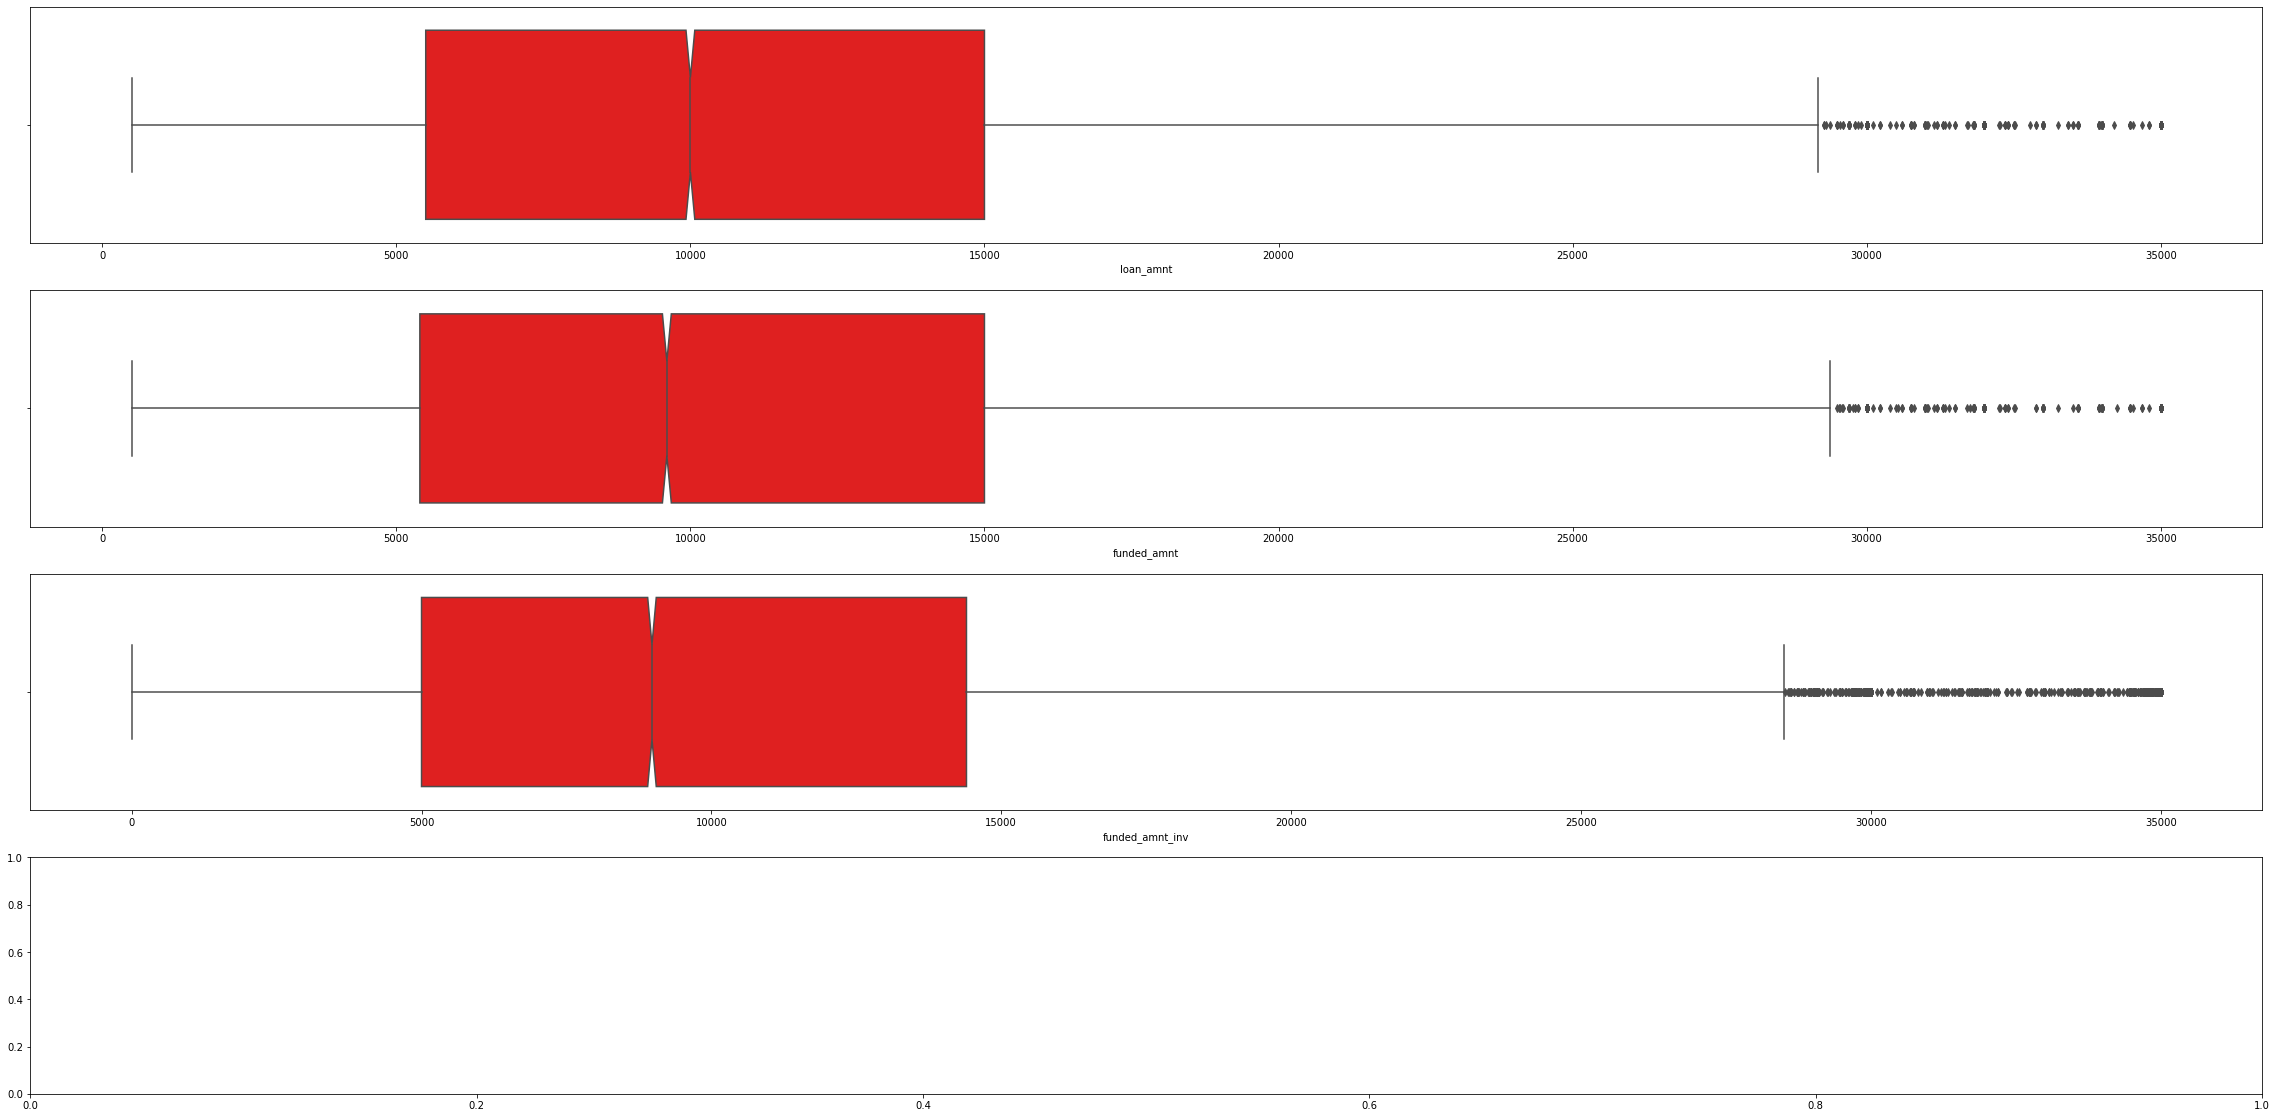

In [31]:
cols = 1
rows = 4
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(40, 20))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i+1)

    sns.boxplot(x=df[col], ax=ax,color="red",notch = True)

fig.tight_layout()
plt.show()


<AxesSubplot:xlabel='loan_amnt'>

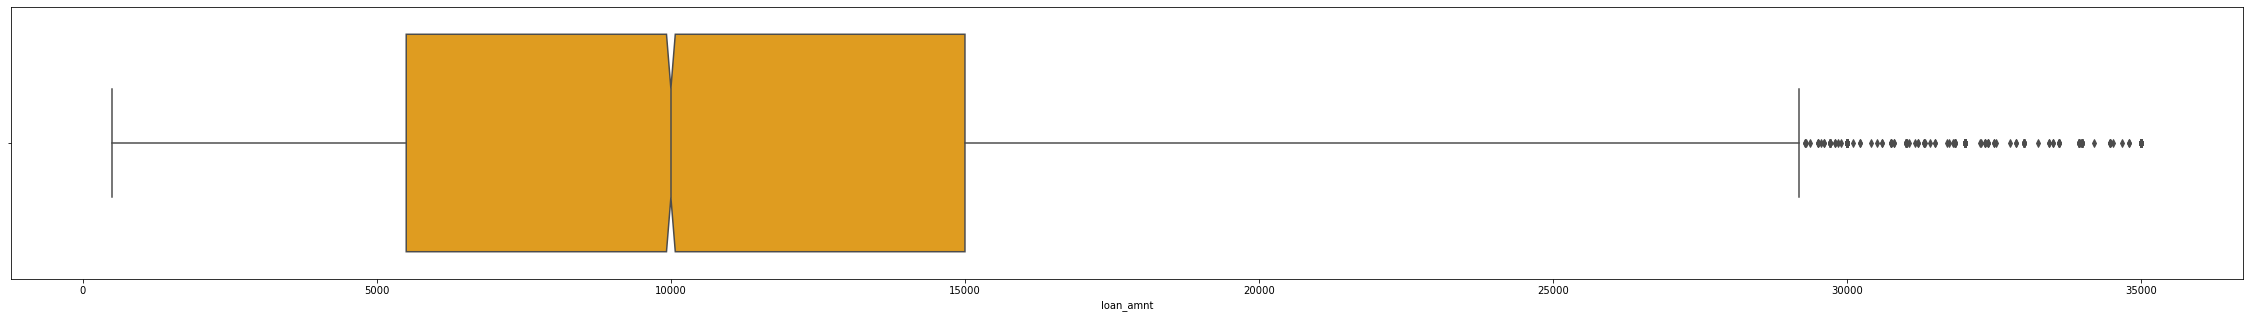

In [ ]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=df["loan_amnt"], notch=True, color="orange")


In [ ]:
from scipy import stats
import numpy as np

z1 = np.abs(stats.zscore(df["loan_amnt"]))
z2 = np.abs(stats.zscore(df["funded_amnt"]))
z3 = np.abs(stats.zscore(df["funded_amnt_inv"]))

print(z1,z2,z3)


0        0.834088
1        1.169363
2        1.182774
3        0.163539
4        1.102308
           ...   
39712    1.169363
39713    0.364704
39714    0.834088
39715    0.834088
39716    0.498814
Name: loan_amnt, Length: 39717, dtype: float64 0        0.827548
1        1.175392
2        1.189305
3        0.131862
4        1.105823
           ...   
39712    1.175392
39713    0.340568
39714    0.827548
39715    0.827548
39716    0.479705
Name: funded_amnt, Length: 39717, dtype: float64 0        0.760687
1        1.107891
2        1.121920
3        0.055756
4        1.037749
           ...   
39712    1.307797
39713    1.335854
39714    1.272726
39715    1.367418
39716    1.346375
Name: funded_amnt_inv, Length: 39717, dtype: float64


In [ ]:
import sklearn 

Q1 = np.percentile(df["loan_amnt"], 25 , interpolation= "midpoint")
Q3 = np.percentile(df["loan_amnt"], 75 , interpolation= "midpoint")

IQR = Q3 - Q1

upper = np.where(df["loan_amnt"] >= (Q3 + 1.5*IQR))
lower = np.where(df["loan_amnt"] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0] , inplace = True)
print("Q1 = ", Q1)
print("Q3 = ", Q3)
print("IQR = ", IQR)


Q1 =  5500.0
Q3 =  15000.0
IQR =  9500.0


In [ ]:
Q1 = np.percentile(df["funded_amnt"], 25, interpolation="midpoint")
Q3 = np.percentile(df["funded_amnt"], 75, interpolation="midpoint")

IQR = Q3 - Q1

upper = np.where(df["funded_amnt"] >= (Q3 + 1.5*IQR))
lower = np.where(df["funded_amnt"] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)
print("Q1 = ", Q1)
print("Q3 = ", Q3)
print("IQR = ", IQR)


KeyError: '[7344 9223] not found in axis'

In [32]:
Q1 = np.percentile(df["loan_amnt"], 25 , interpolation= "midpoint")
Q3 = np.percentile(df["loan_amnt"], 75 , interpolation= "midpoint")

IQR = Q3 - Q1

upper = np.where(df["loan_amnt"] >= (Q3 + 1.5*IQR))
lower = np.where(df["loan_amnt"] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0] , inplace = True)
print("Q1 = ", Q1)
print("Q3 = ", Q3)
print("IQR = ", IQR)


Q1 =  5500.0
Q3 =  15000.0
IQR =  9500.0


<AxesSubplot:xlabel='loan_amnt'>

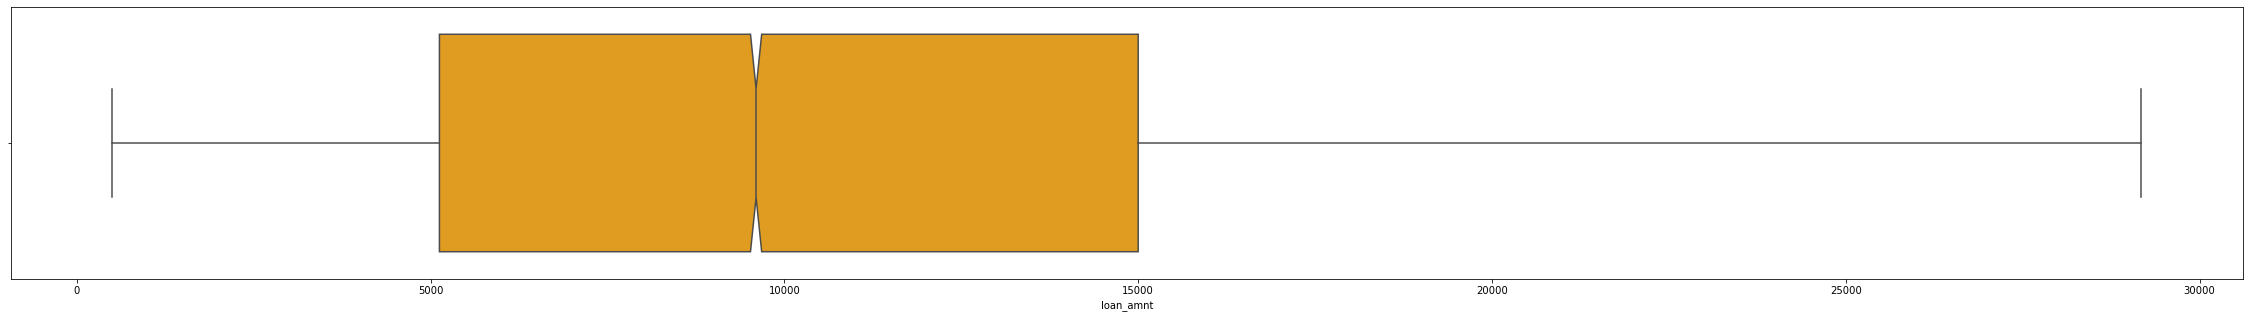

In [33]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=df["loan_amnt"], notch=True, color="orange")


<AxesSubplot:xlabel='annual_inc'>

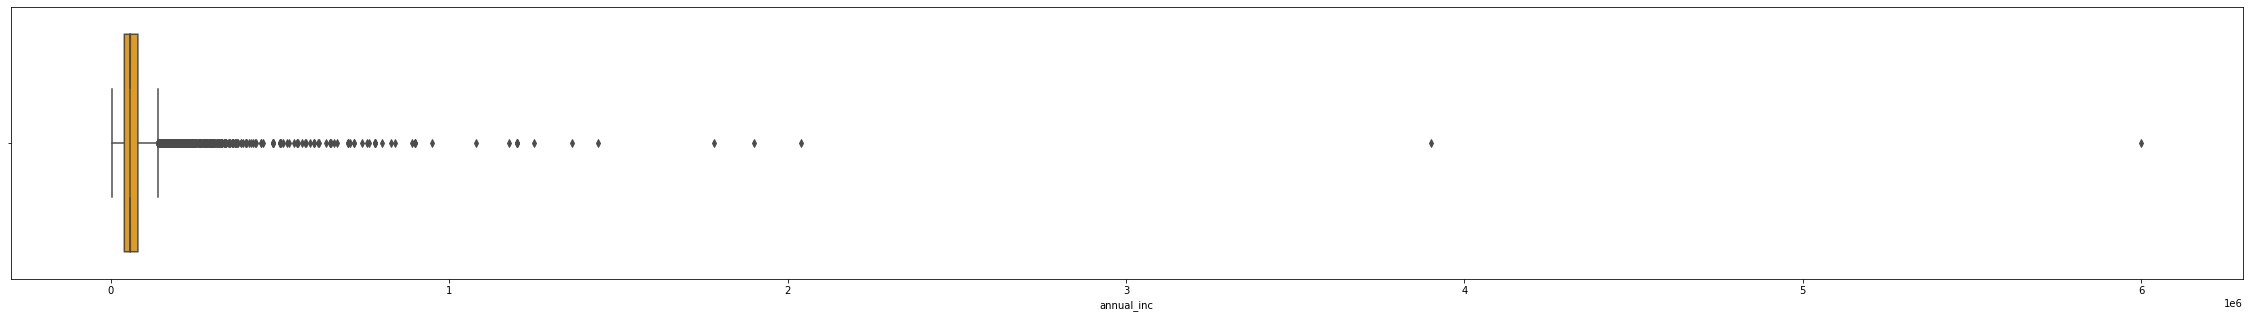

In [34]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=df["annual_inc"], notch=True, color="orange")


<AxesSubplot:xlabel='total_rec_late_fee', ylabel='Count'>

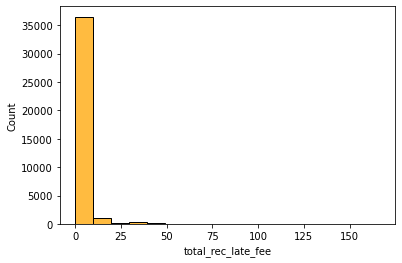

In [35]:
sns.histplot(x=df["total_rec_late_fee"],  color="orange")

In [36]:
df["annual_inc"].describe()

count    3.848700e+04
mean     6.721046e+04
std      6.250178e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.749200e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [37]:
dfnew = df[df["annual_inc"] <= 1000000]


<AxesSubplot:xlabel='annual_inc'>

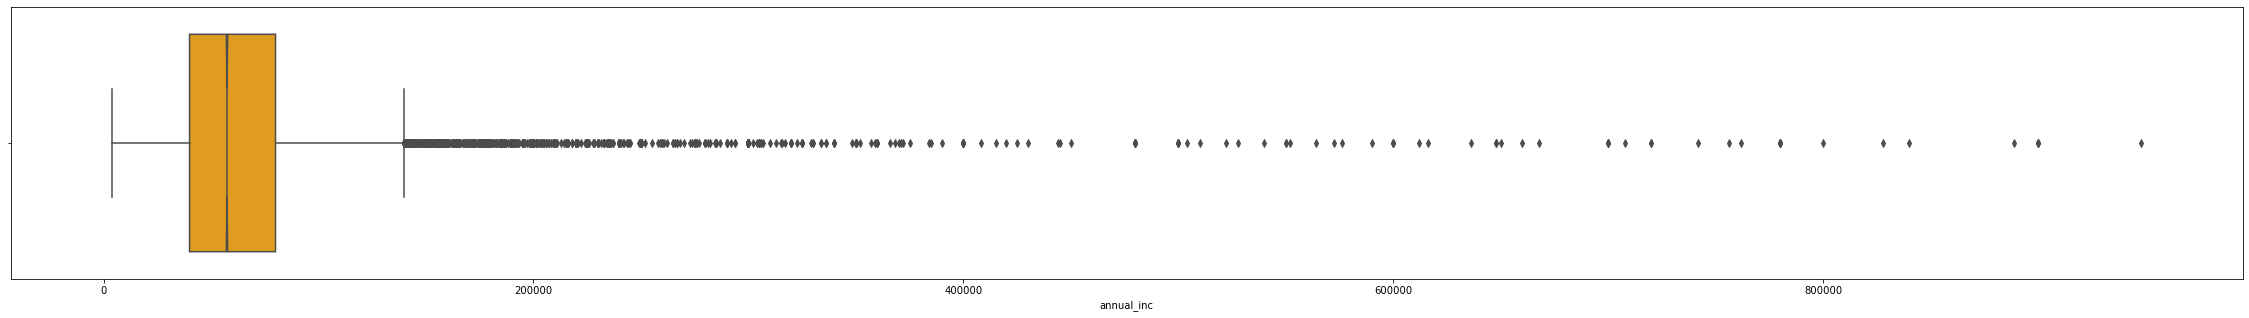

In [38]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=dfnew["annual_inc"], notch=True, color="orange")


In [39]:


Q1 = np.percentile(df["annual_inc"], 25, interpolation="midpoint")
Q3 = np.percentile(df["annual_inc"], 75, interpolation="midpoint")

IQR = Q3 - Q1

upper = np.where(df["annual_inc"] >= (Q3 + 1.5*IQR))
lower = np.where(df["annual_inc"] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)


KeyError: '[ 1372  2502  3115  3309  4099  4219  4393  4764  5268  5389  5498  5949\n  6176  6382  6432  6504  6724  6842  6963  7416  7667  7778  8027  8472\n  8798  9869 10061 10172 10235 10807 11171 11199 11549 11924 11964 12788\n 12922 13168 13248 13635 14119 14174 15311 15860 15924 16351 16370 16935\n 16987 17683 18093 18355 18779 19753] not found in axis'

<AxesSubplot:>

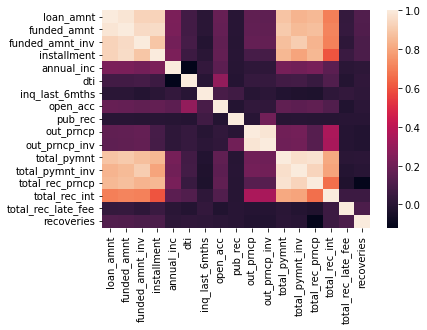

In [40]:
corrm = df.corr()
sns.heatmap(corrm)

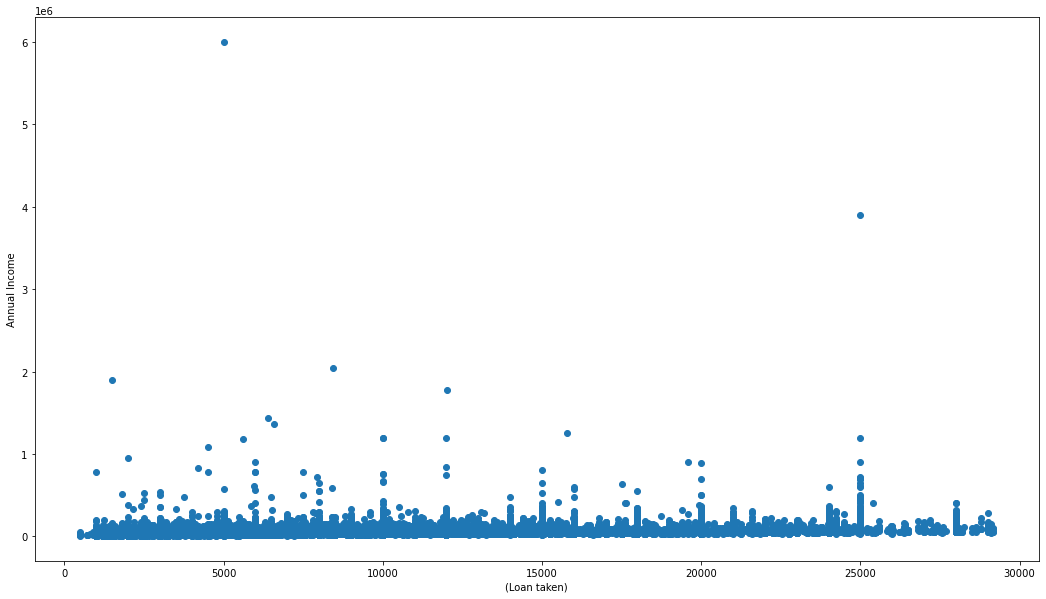

In [41]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(df['loan_amnt'], df['annual_inc'])

# x-axis label
ax.set_xlabel('(Loan taken)')

# y-axis label
ax.set_ylabel('Annual Income')
plt.show()


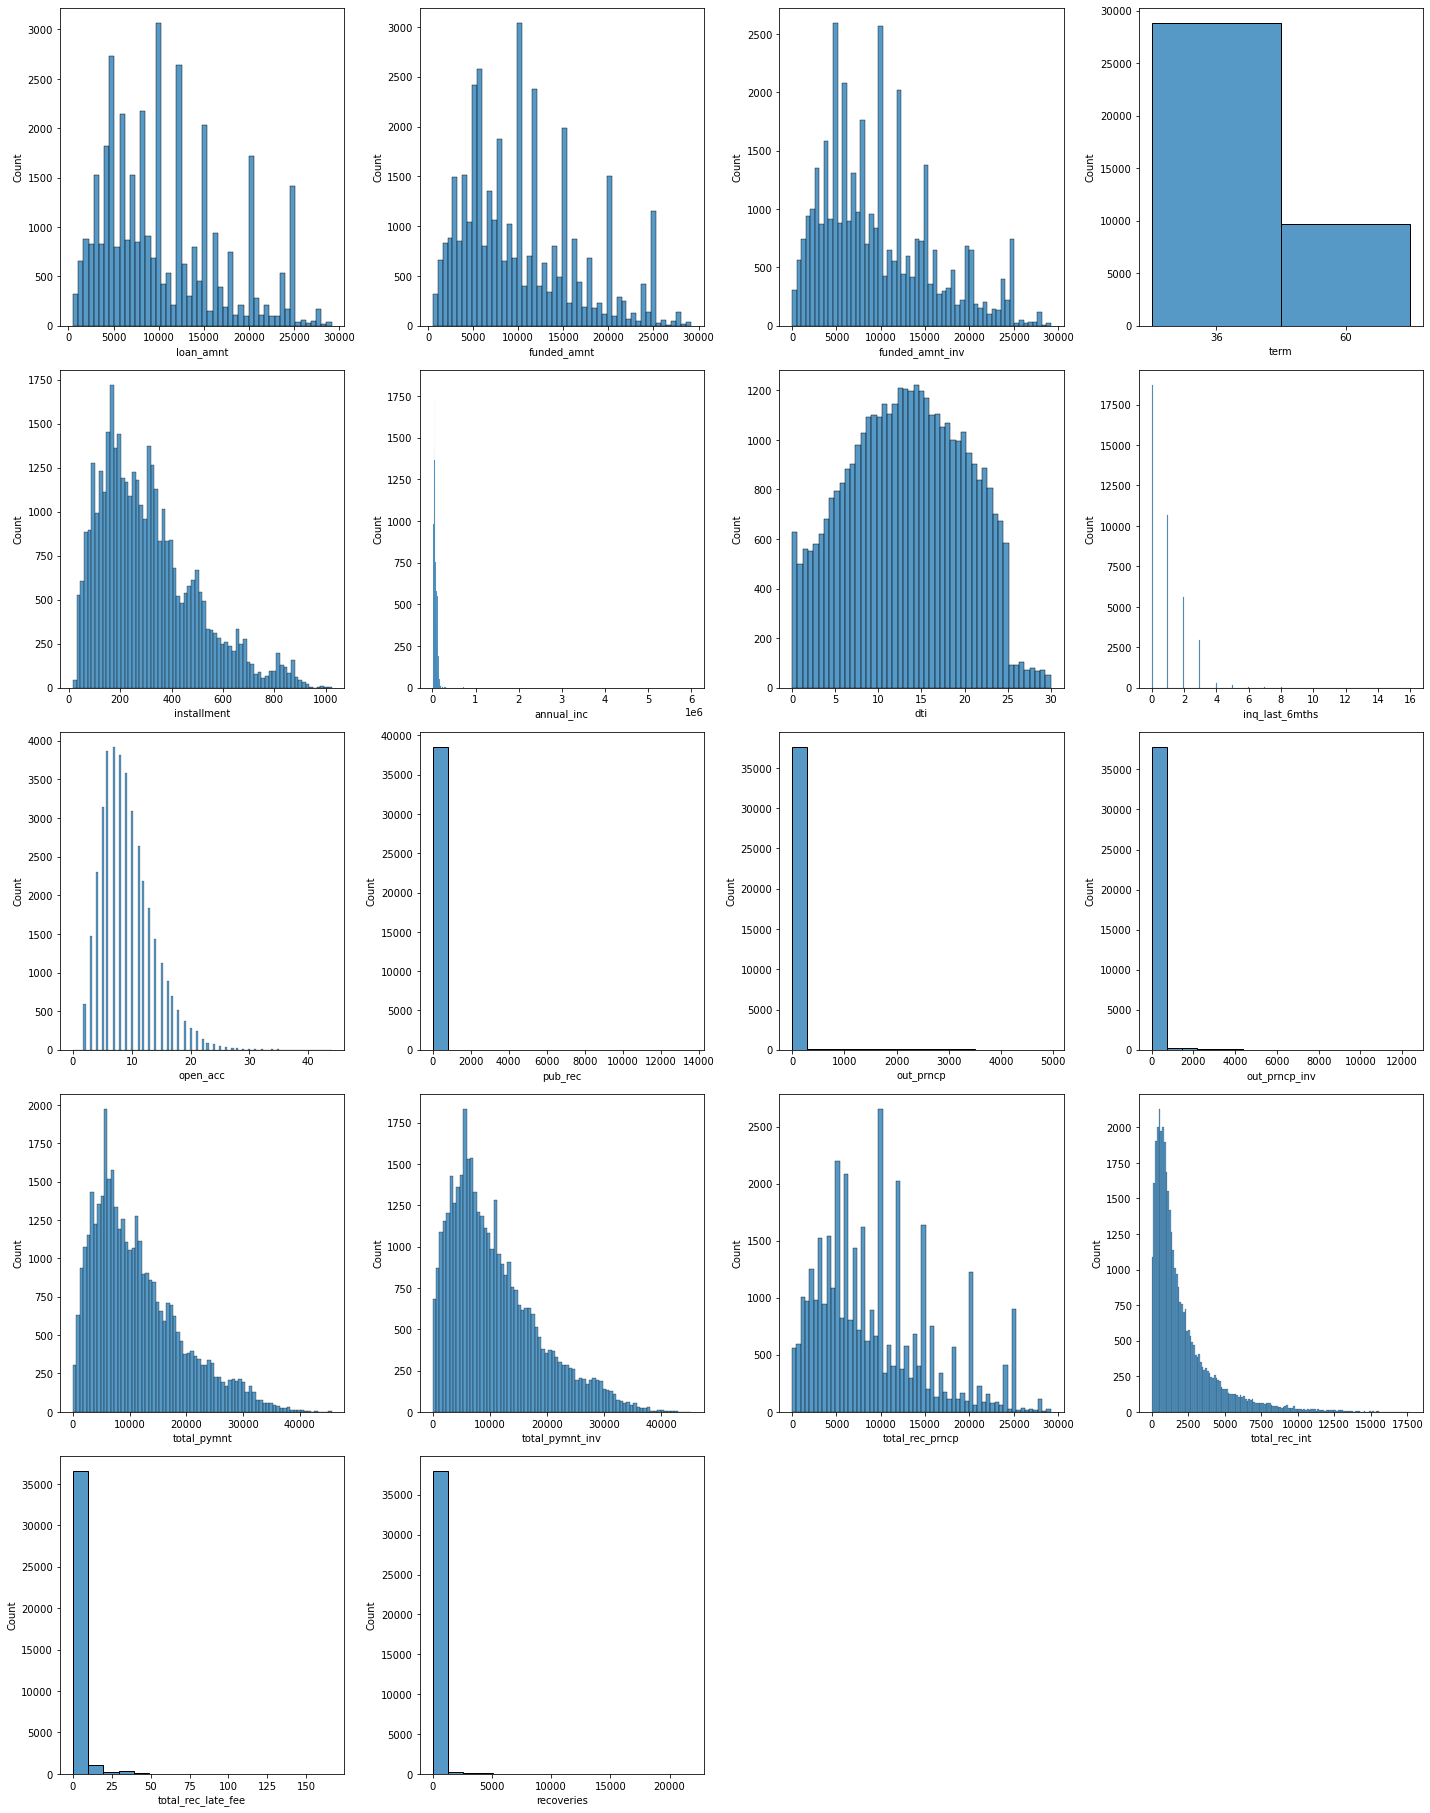

In [42]:
cols = 4
rows = 10
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    #for i in num_cols:
    ax = fig.add_subplot(rows, cols, i+1)

    sns.histplot(x=df[col], ax=ax)

fig.tight_layout()
plt.show()


<AxesSubplot:xlabel='inq_last_6mths', ylabel='recoveries'>

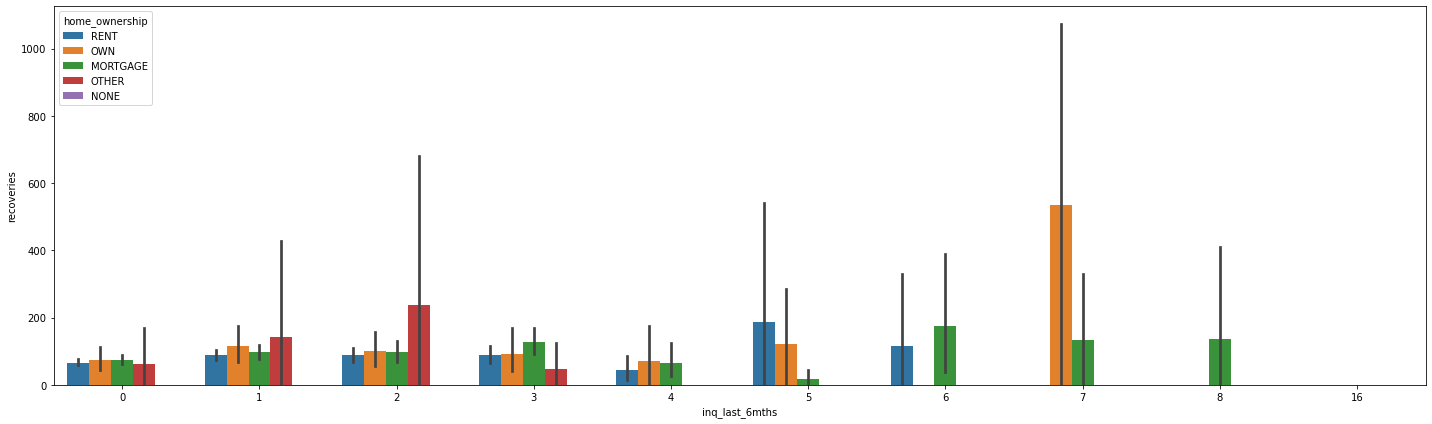

In [55]:
fig, axs = plt.subplots(1, 1,
                        figsize=(20, 6),
                        tight_layout=True)

sns.barplot(x="inq_last_6mths", y="recoveries",hue = "home_ownership", data=df)


<AxesSubplot:xlabel='total_rec_late_fee', ylabel='recoveries'>

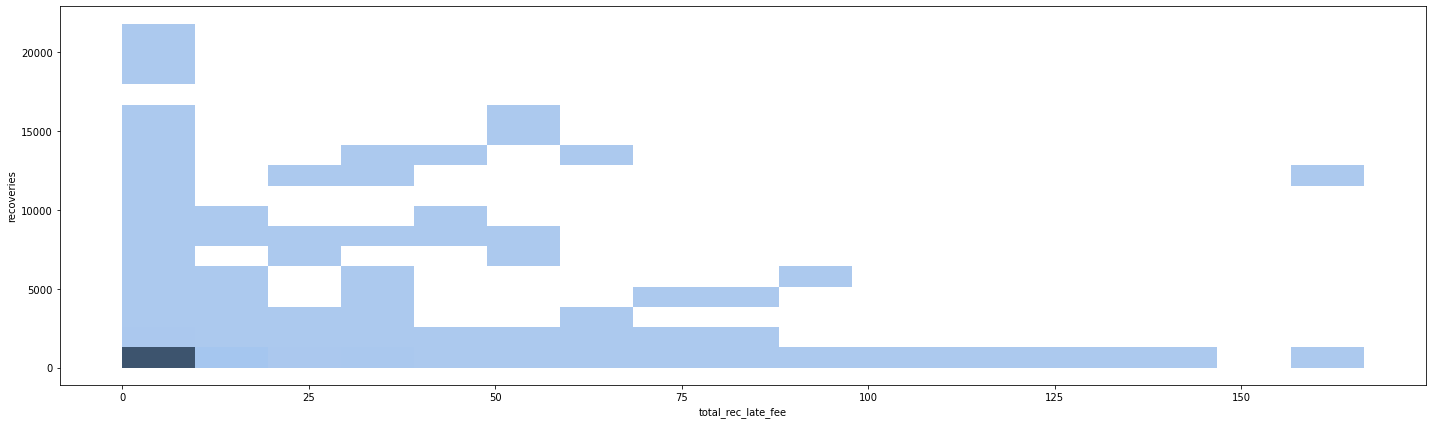

In [44]:
fig, axs = plt.subplots(1, 1,
                        figsize=(20, 6),
                        tight_layout=True)

sns.histplot(x="total_rec_late_fee", y="recoveries", data=df)


In [45]:
df["installment"].describe()

count    38487.000000
mean       307.877573
std        186.797031
min         15.690000
25%        164.230000
50%        272.980000
75%        407.170000
max       1022.930000
Name: installment, dtype: float64

In [46]:
df["open_acc"].describe()

count    38487.000000
mean         9.247590
std          4.395855
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [47]:
df["total_rec_late_fee"].describe()

count    38487.000000
mean         1.327581
std          7.047173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        166.429711
Name: total_rec_late_fee, dtype: float64

In [48]:
dfnew = df.sample(n = 30)
#dfnew["annual_inc"].mean()
df["annual_inc"].mean()


67210.4624075662

In [49]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(df["annual_inc"], 67210.46)
pval


0.9999939705160616

In [50]:
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are failed to reject null hypothesis")


we are failed to reject null hypothesis


In [51]:
dfg = df.groupby(["grade","sub_grade"],sort=True)

In [52]:
dfg.first()

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  \
grade sub_grade                                                          
A     A1              3600         3600       3600.00000   36     6.03   
      A2             11000        11000      11000.00000   36     6.62   
      A3              4375         4375       4375.00000   36     7.51   
      A4              5000         5000       5000.00000   36     7.90   
      A5              5000         5000       5000.00000   36     8.90   
B     B1              3000         3000       3000.00000   36     9.91   
      B2              5000         5000       4975.00000   36    10.65   
      B3              6000         6000       6000.00000   36    11.71   
      B4             21000        21000      21000.00000   36    12.42   
      B5              3000         3000       3000.00000   60    12.69   
C     C1             10000        10000      10000.00000   36    13.49   
      C2             15000        15000       8725.00000   36    14.27   
      C3              6500         6500       6500.00000   60    14.65   
      C4              2500         2500       2500.00000   60    15.27   
      C5              2400         2400       2400.00000   36    15.96   
D     D1              1000         1000       1000.00000   36    16.29   
      D2              5000         5000       5000.00000   60    16.77   
      D3             17500         8950       8925.00000   60    17.27   
      D4             20975        13575      13550.00000   60    17.58   
      D5              3000         3000       3000.00000   36    18.25   
E     E1              3000         3000       3000.00000   36    18.64   
      E2              4000         4000       4000.00000   36    19.03   
      E3              8200         8200       8200.00000   60    19.42   
      E4             21000        21000      20975.00000   60    19.91   
      E5             21000        21000      20120.80657   60    20.30   
F     F1             26800        26800      26800.00000   60    20.89   
      F2              5600         5600       5600.00000   60    21.28   
      F3              7250         7200       7175.00000   60    21.67   
      F4             15300        15300      15275.00000   60    22.06   
      F5             10400        10400      10400.00000   60    22.35   
G     G1             22400        22400      22400.00000   60    22.74   
      G2             12375        12375      12375.00000   60    23.13   
      G3             13000        13000      13000.00000   60    23.52   
      G4             24250        18100      18075.00000   60    23.91   
      G5             24250        24250      24225.00000   60    24.11   

                 installment home_ownership  annual_inc verification_status  \
grade sub_grade                                                               
A     A1              109.57       MORTGAGE    110000.0        Not Verified   
      A2              337.75           RENT     70000.0        Not Verified   
      A3              136.11       MORTGAGE     17108.0     Source Verified   
      A4              156.46           RENT     36000.0     Source Verified   
      A5              158.77           RENT     24044.0            Verified   
B     B1               96.68           RENT     15000.0     Source Verified   
      B2              162.87           RENT     24000.0            Verified   
      B3              198.46       MORTGAGE     84000.0            Verified   
      B4              701.73           RENT    105000.0            Verified   
      B5               67.79           RENT     80000.0     Source Verified   
C     C1              339.31           RENT     49200.0     Source Verified   
      C2              514.64           RENT     60000.0        Not Verified   
      C3              153.45            OWN     72000.0        Not Verified   
      C4               59.83           RENT     30000.0     Source Verified   
      C5      

<AxesSubplot:xlabel='home_ownership', ylabel='recoveries'>

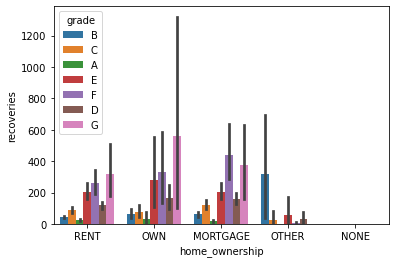

In [53]:
sns.barplot(y="recoveries", x="home_ownership",hue = "grade", data=df)